# <center>EXPLORATORY DATA ANALYSIS

In this section, we perform descriptive statistics and visualize the distribution of variables.

Import necessary libraries and load the cleaned dataset.


In [ ]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from pandas.api import types as pdtypes

In [2]:
#load the clean csv after data cleaning anf feature engineering
df = pd.read_csv('u5mr_clean.csv')
df.head()

,CASEID,Respondents current age,Region,Type of place of residence,Highest educational level,Religion,Ethnicity,Number of household members (listed),Wealth index combined,"Type of cooking fuel (smoke exposure, indoor air pollution)",...,Received inactivated polio (IPV)_missing,Received Rotavirus 2_missing,Place where most vaccinations were received_missing,Yellow fever vaccine_missing,Given child anything other than breast milk_missing,Visited health facility last 12 months_missing,Getting medical help for self: distance to health facility_missing,Mode of transportation to nearest healthcare facility_missing,prenatal_help_missing,delivery_help_missing
0,1 4 2,34.0,1.0,1.0,0.0,7.0,11.0,6,4.0,2.0,...,0,0,0,1,0,0,0,0,0,0
1,1 13 2,39.0,1.0,1.0,2.0,1.0,3.0,8,5.0,2.0,...,1,1,1,1,1,0,0,0,1,1
2,1 26 2,28.0,1.0,1.0,2.0,3.0,3.0,5,4.0,2.0,...,1,1,1,1,1,0,0,0,1,1
3,1 42 1,30.0,1.0,1.0,2.0,4.0,3.0,3,5.0,2.0,...,1,1,1,1,1,1,1,1,1,1
4,1 55 2,34.0,1.0,1.0,2.0,2.0,3.0,4,5.0,2.0,...,0,0,0,1,1,1,1,1,0,0


In [3]:
df.select_dtypes(['object','category'])

,CASEID,mortality_category,prenatal_help,delivery_help
0,1 4 2,Alive or 5+,1,1
1,1 13 2,Alive or 5+,1,1
2,1 26 2,Alive or 5+,1,1
3,1 42 1,Alive or 5+,1,1
4,1 55 2,Alive or 5+,1,1
...,...,...,...,...
19525,1692 18 2,Alive or 5+,1,1
19526,1692 18 2,Alive or 5+,1,1
19527,1692 66 2,Alive or 5+,1,1
19528,1692 84 2,Alive or 5+,1,1


We will proceed with exploratory data analysis, where we will explore the mortality figures in neonates, infants and children aged 1-5 using visualizations.

## 1. Mortality Plots

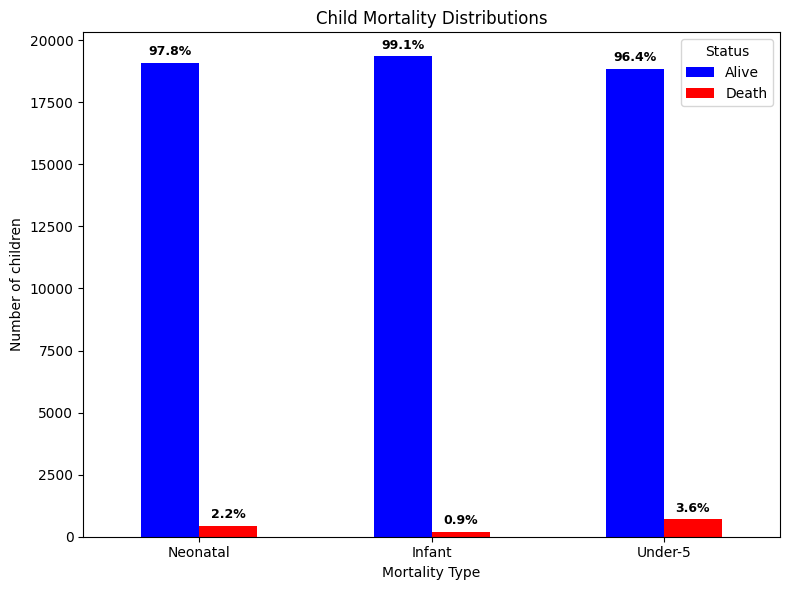

In [4]:
#Plot Child Mortality Distributions
# Prepare data
mortality_cols = {
    "neonatal_mortality": "Neonatal",
    "infant_mortality": "Infant",
    "under5_mortality": "Under-5"
}

counts = pd.DataFrame({
    label: df[col].value_counts().sort_index()
    for col, label in mortality_cols.items()
}).T

# Ensure Alive=0, Death=1 order
counts = counts[[0, 1]]
counts.columns = ["Alive", "Death"]

# Plot grouped bar chart
ax = counts.plot(
    kind="bar",
    stacked=False,
    color=["blue", "red"],
    figsize=(8, 6)
)

# Add percentage labels correctly using bar containers
for container in ax.containers:
    # Get group total per mortality type
    for bar in container:
        height = bar.get_height()
        if height > 0:
            # Total of the group (Alive+Death)
            total = counts.loc[bar.get_x() + bar.get_width()/2, :].sum() if False else None
        # Better way: use index position
    for i, bar in enumerate(container):
        height = bar.get_height()
        if height > 0:
            total = counts.iloc[i].sum()
            pct = height / total * 100
            ax.text(
                bar.get_x() + bar.get_width()/2,
                height + total * 0.01,
                f"{pct:.1f}%",
                ha='center', va='bottom',
                fontsize=9, fontweight="bold"
            )

plt.ylabel("Number of children")
plt.xlabel("Mortality Type")
plt.title("Child Mortality Distributions")
plt.xticks(rotation=0)
plt.legend(title="Status")
plt.tight_layout()
plt.show()



#### Overall Mortality Rates

The chart compares the mortality rates for three different groups: **Neonatal**, **Infant**, and **Under-5**.

* **Neonatal mortality** (deaths within the first 28 days of life) shows that **2.2%** of newborns died, while 97.8% survived.
* **Infant mortality** (deaths within the first year of life) shows the lowest mortality rate, at just **0.9%**. This is a curious finding, as infant mortality is typically expected to be higher than neonatal mortality, since it includes neonatal deaths.
* **Under-5 mortality** (deaths before the fifth birthday) has the highest mortality rate at **3.6%**, which is expected as it accounts for deaths over a longer period of time.

The chart presents a notable anomaly with the infant mortality rate (0.9%) being lower than the neonatal mortality rate (2.2%). Infant mortality includes all deaths from birth up to one year of age, and therefore should always be equal to or greater than the neonatal mortality rate, which only covers deaths in the first 28 days. This suggests a potential issue with the data, either in its collection or its representation on this specific chart.

## 2. Demographics and Household Analysis

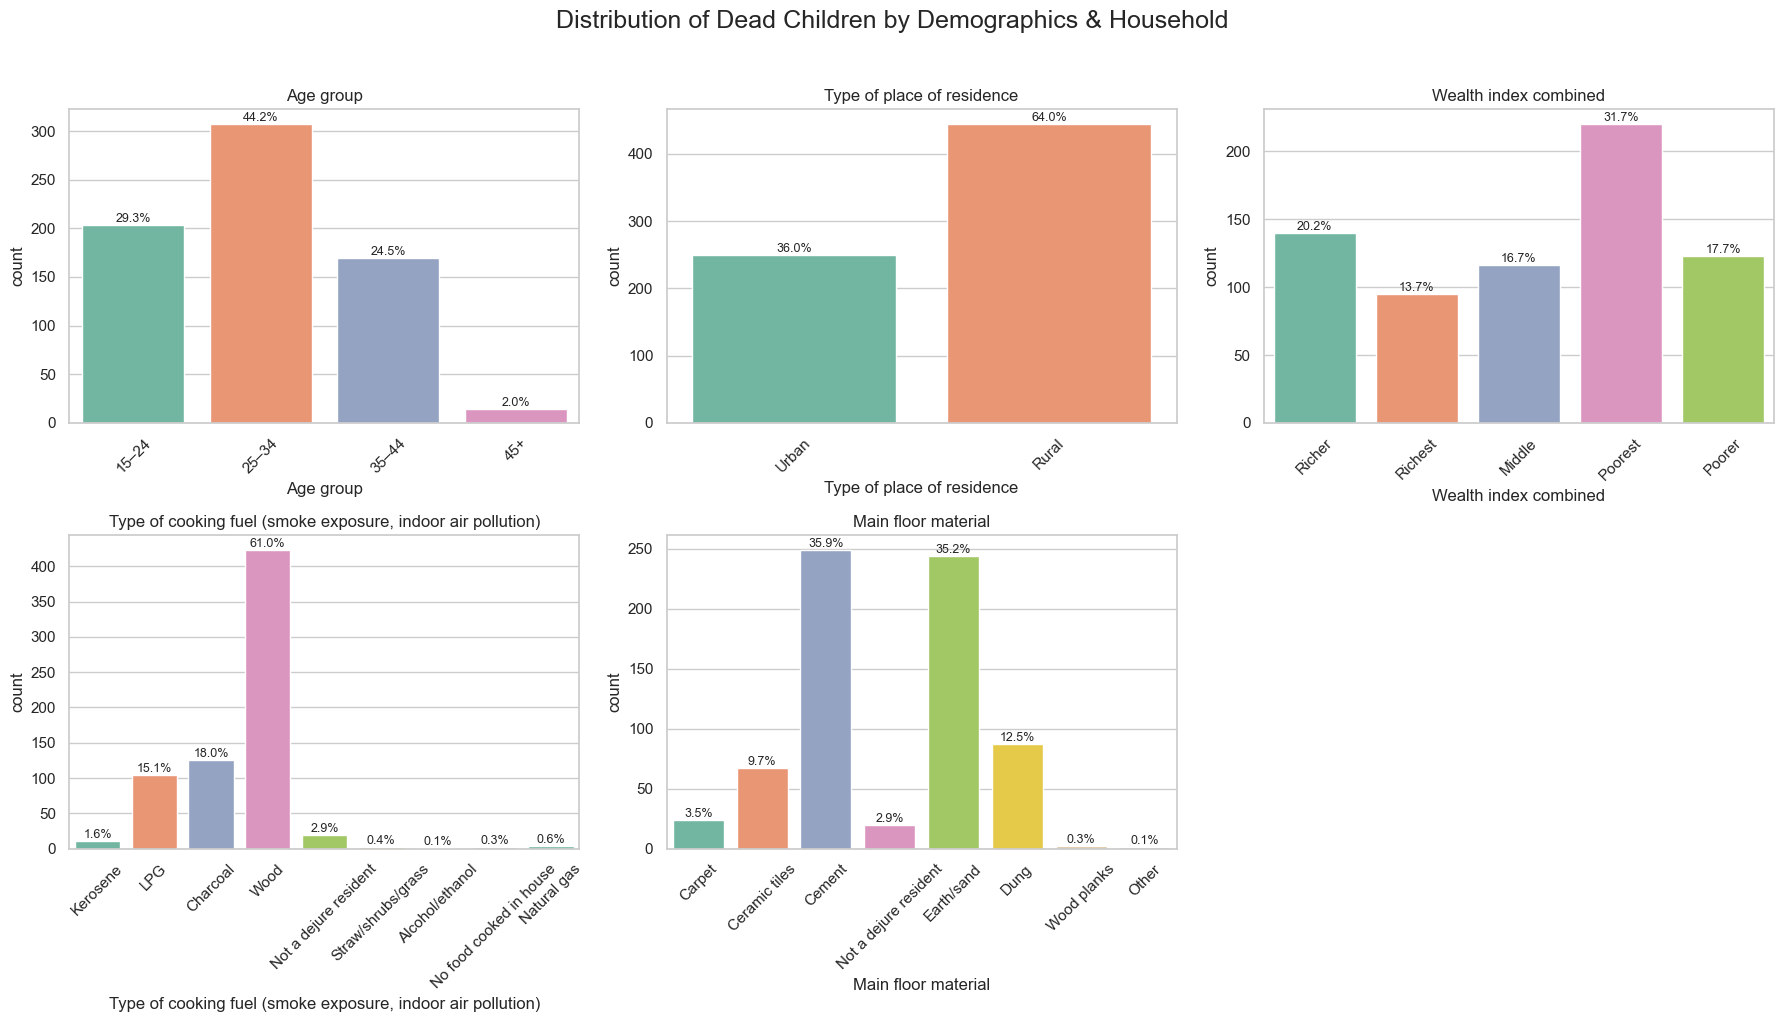

In [5]:
# Filter only mortality==1
# Make age categorical
age_bins = [15, 25, 35, 45, 55]  # adjust as needed
age_labels = ["15–24", "25–34", "35–44", "45+"]
df["Age group"] = pd.cut(df["Respondents current age"], bins=age_bins, labels=age_labels, right=False)

df_dead = df[df["under5_mortality"] == 1].copy()

# Define mappings
residence_map = {1: "Urban", 2: "Rural"}
wealth_map = {1: "Poorest", 2: "Poorer", 3: "Middle", 4: "Richer", 5: "Richest"}
cooking_map = {
    1: "Electricity", 2: "LPG", 3: "Natural gas", 4: "Biogas", 5: "Kerosene",
    6: "Coal/lignite", 7: "Charcoal", 8: "Wood", 9: "Straw/shrubs/grass",
    10: "Agricultural crop", 11: "Animal dung", 12: "Alcohol/ethanol",
    13: "Gasoline/diesel", 14: "Solar Power", 95: "No food cooked in house",
    96: "Other", 97: "Not a dejure resident"
}
floor_map = {
    10: "NATURAL", 11: "Earth/sand", 12: "Dung",
    20: "RUDIMENTARY", 21: "Wood planks", 22: "Palm/bamboo",
    30: "FINISHED", 31: "Parquet/polished wood", 32: "Vinyl/asphalt",
    33: "Ceramic tiles", 34: "Cement", 35: "Carpet",
    96: "Other", 97: "Not a dejure resident"
}

# Apply mappings
df_dead["Type of place of residence"] = df_dead["Type of place of residence"].map(residence_map)
df_dead["Wealth index combined"] = df_dead["Wealth index combined"].map(wealth_map)
df_dead["Type of cooking fuel (smoke exposure, indoor air pollution)"] = df_dead["Type of cooking fuel (smoke exposure, indoor air pollution)"].map(cooking_map)
df_dead["Main floor material"] = df_dead["Main floor material"].map(floor_map)

# Variables
variables = [
    "Age group",
    "Type of place of residence",
    "Wealth index combined",
    "Type of cooking fuel (smoke exposure, indoor air pollution)",
    "Main floor material"
]

# Plot setup
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    g = sns.countplot(
        data=df_dead,
        x=var,
        hue=var,              
        palette="Set2",       #colors applied per category
        dodge=False,          #prevents splitting bars (keeps single bar per category)        
        ax=axes[i]
    )
    
    # Rotate labels
    g.set_title(var)
    g.tick_params(axis='x', rotation=45)
    
    # Add percentage annotations
    total = len(df_dead)
    for p in g.patches:
        height = p.get_height()
        if height > 0:
            g.annotate(f"{100*height/total:.1f}%", 
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=9, rotation=0)

# Remove unused subplot
fig.delaxes(axes[-1])

# Adjust layout and put legend outside
fig.suptitle("Distribution of Dead Children by Demographics & Household", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()



#### Age and Residence

The **Age group** chart reveals that the highest percentage of child deaths occurred in households led by individuals aged **25-34** (44.2%), followed by those aged **15-24** (29.3%). This indicates that children of younger parents are disproportionately affected.

The **Type of place of residence** chart shows a significant disparity, with a majority of deaths (**64.0%**) occurring in **rural households**, compared to **36.0%** in urban households.

#### Household Characteristics

The **Wealth index combined** chart demonstrates a clear correlation between poverty and child mortality. The largest share of deaths (**31.7%**) was in the **poorest** households, followed by the **poorer** quintile (**17.7%**), highlighting the role of socioeconomic status.

The **Type of cooking fuel** chart shows that the vast majority of deaths (**61.0%**) were in homes that use **wood** for cooking, a fuel type known for causing significant indoor air pollution.

The **Main floor material** chart indicates that the highest number of deaths occurred in households with floors made of **cement** (**35.9%**) and **earth/sand** (**35.2%**), suggesting a link between less developed housing conditions and child mortality.

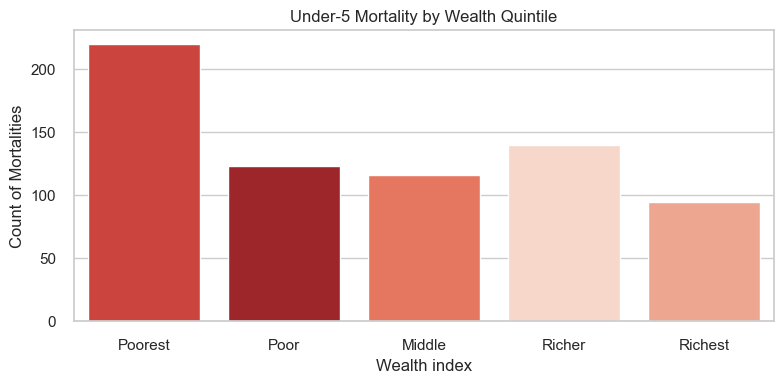

In [21]:
# Filter mortalities and make a safe copy
mortality_df = df[df['under5_mortality'] == 1].copy()

# Map numeric codes to readable labels
label_map = {1: "Poorest", 2: "Poor", 3: "Middle", 4: "Richer", 5: "Richest"}
mortality_df['Wealth_label'] = mortality_df['Wealth index combined'].map(label_map)

# Define desired order (so bars appear Poorest -> Richest)
order = [label_map[i] for i in sorted(label_map.keys())]

plt.figure(figsize=(8,4))
sns.countplot(x='Wealth_label', data=mortality_df, order=order, hue='Wealth_label', palette="Reds", legend=False)
plt.title("Under-5 Mortality by Wealth Quintile")
plt.xlabel("Wealth index")
plt.ylabel("Count of Mortalities")
plt.tight_layout()
plt.show()


Based on the chart "Under-5 Mortality by Wealth Quintile," there's a clear inverse relationship between wealth and under-5 mortality. The **poorest** wealth quintile has the highest count of under-5 deaths, at over 200. Conversely, the **richest** quintile has the lowest number of deaths, below 100. This indicates that children in households with lower economic status face a significantly higher risk of mortality.

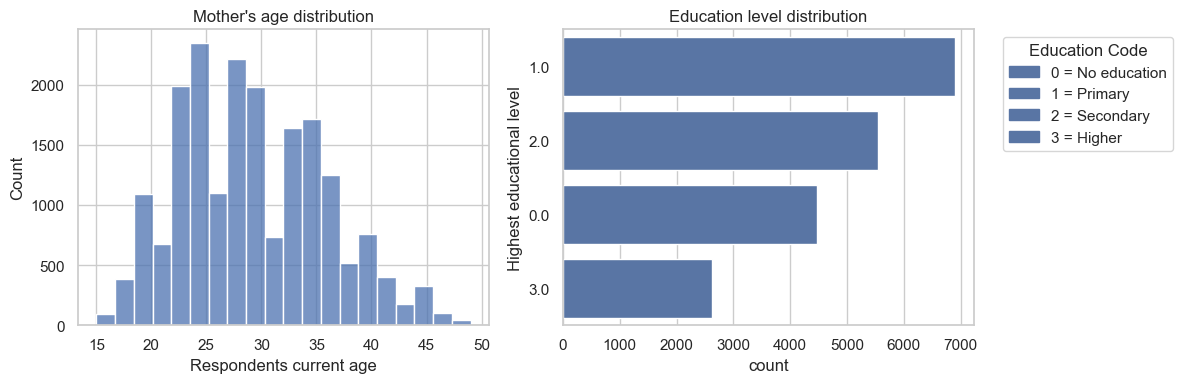

In [7]:
#Education Level and Age Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Age distribution
sns.histplot(df['Respondents current age'], bins=20, ax=axes[0], kde=False)
axes[0].set_title("Mother's age distribution")

# Education distribution
order = df['Highest educational level'].value_counts().index
barplot = sns.countplot(
    y='Highest educational level',
    data=df,
    order=order,
    ax=axes[1]
)
axes[1].set_title("Education level distribution")


# Custom legend with actual bar colors
legend_labels = {
    0: "No education",
    1: "Primary",
    2: "Secondary",
    3: "Higher"
}

# Get bar colors from the plot
colors = [p.get_facecolor() for p in barplot.patches]

# Create patches with matching colors
patches = [
    mpatches.Patch(color=colors[i], label=f"{code} = {label}")
    for i, (code, label) in enumerate(legend_labels.items())
]

axes[1].legend(handles=patches, title="Education Code", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()




#### Mother's Age Distribution

The first chart, **"Mother's age distribution,"** is a histogram showing the frequency of mothers' ages. The distribution is roughly bell-shaped, peaking around ages **25 to 30**. This indicates that the majority of respondents in the dataset are in this age range. The count of mothers gradually decreases for both younger and older age groups, with very few respondents at the extremes (e.g., under 15 or over 45).

#### Education Level Distribution

The second chart, **"Education level distribution,"** is a horizontal bar chart that shows the count of mothers at different educational levels. The legend clarifies the codes:

* **1** represents **Primary** education.
* **2** represents **Secondary** education.
* **0** represents **No Education**.
* **3** represents **Higher** education.

The data reveals that **Primary education** (code 1) is the most common educational level among the mothers, with a count of nearly 7,000. This is followed by **Secondary education** (code 2), which has a count of just over 5,000. The third most common level is **No Education** (code 0), with a count of around 4,500. **Higher education** (code 3) is the least common, with a count of less than 2,000.
 This distribution highlights a significant portion of the population with limited formal education, a factor that can be related to various health and social outcomes.

## 3. Maternal and ANC Factors' Analysis

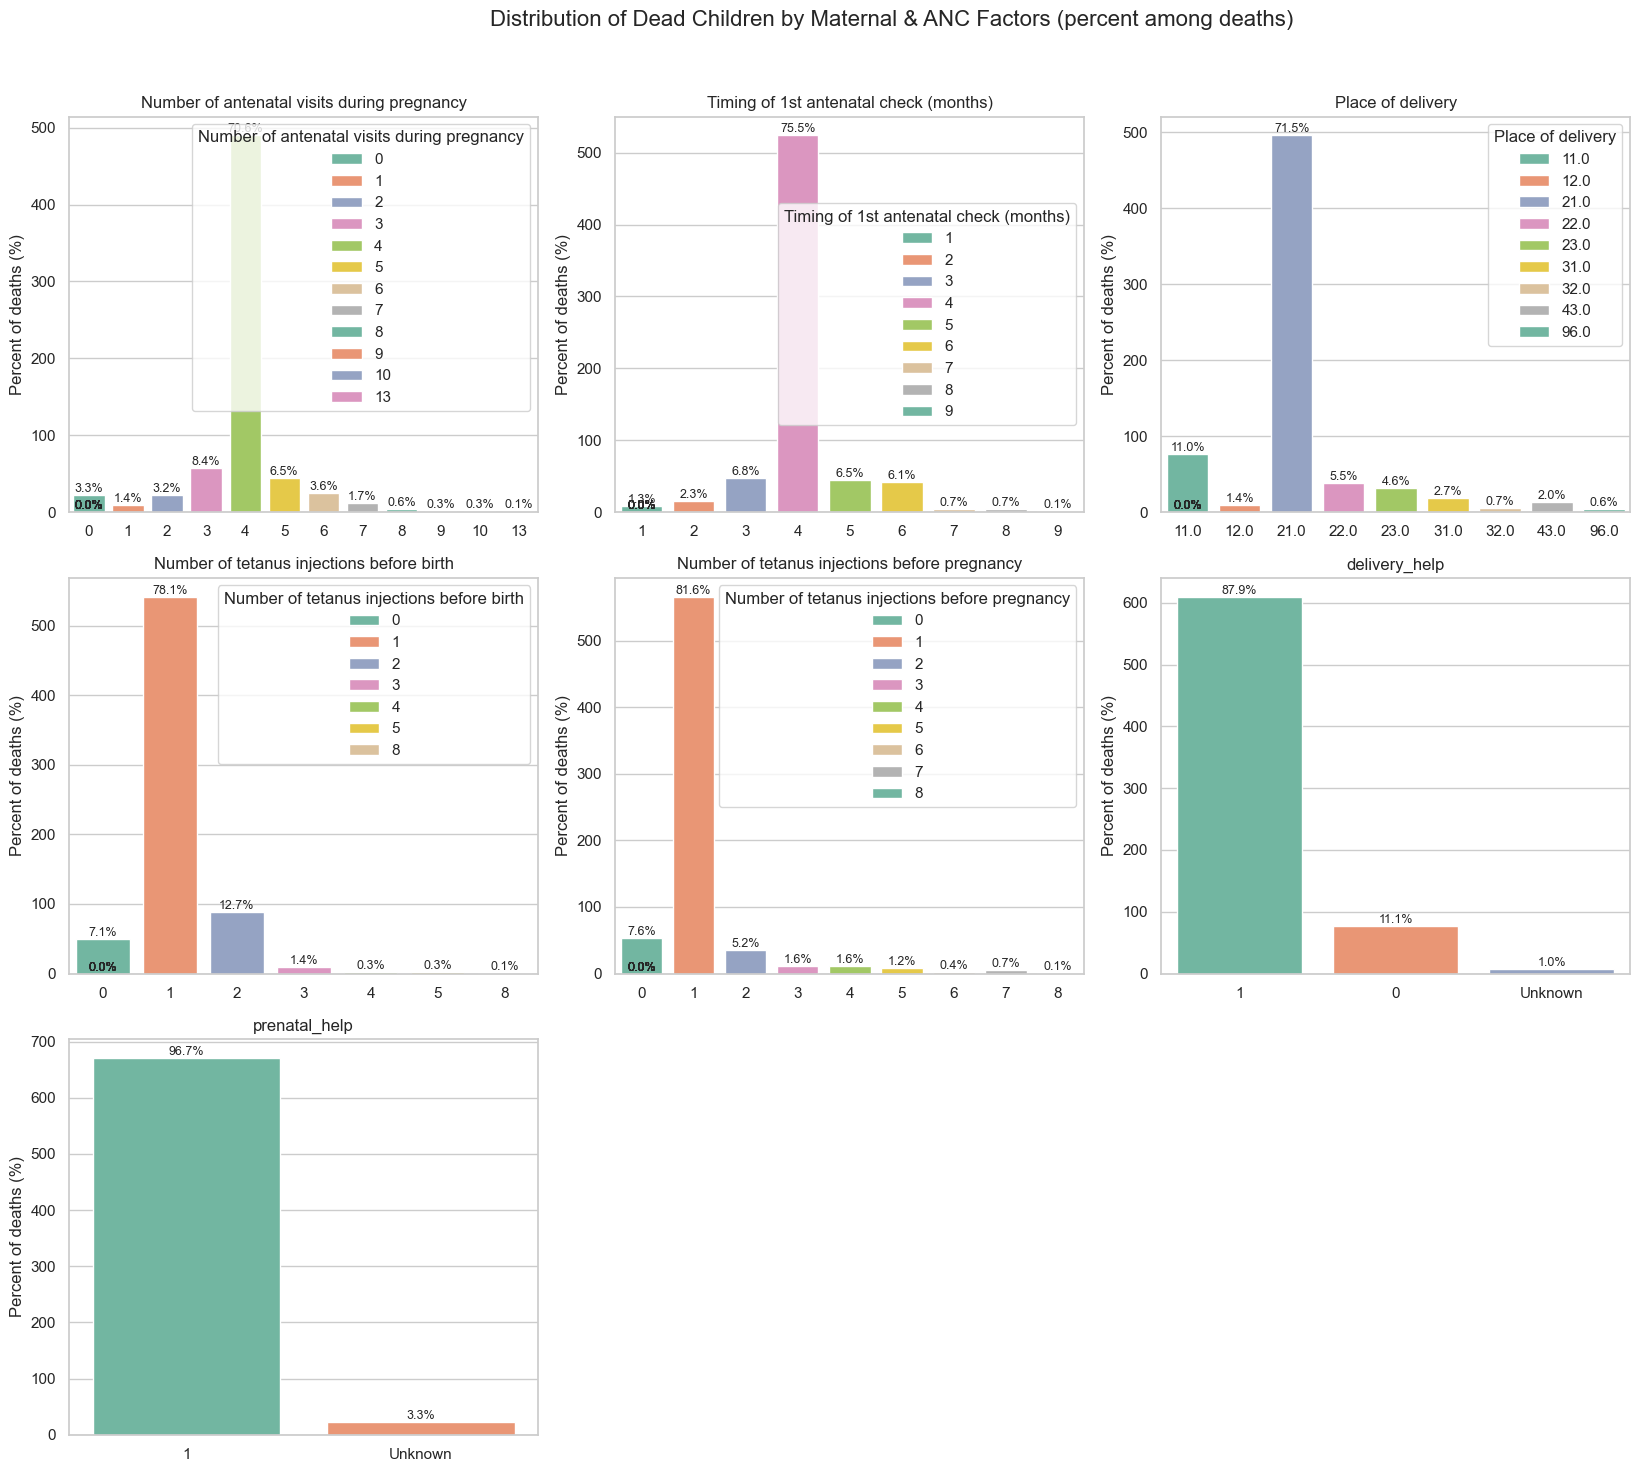

In [8]:
# Variables to include 
factors = [
    'Number of antenatal visits during pregnancy',
    'Timing of 1st antenatal check (months)',
    'Place of delivery',
    'Number of tetanus injections before birth',
    'Number of tetanus injections before pregnancy',
    'delivery_help',
    'prenatal_help'
]

# 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(factors):
    ax = axes[i]
    
    # Countplot
    g = sns.countplot(
        data=df_dead,
        x=col,
        ax=ax,
        hue=col,  # fixes palette warning
        palette="Set2",
    )
    
    # Add percentages on top of bars
    total = len(df_dead)
    for p in ax.patches:
        percentage = 100 * p.get_height() / total
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=9)
    
    ax.set_ylabel("Percent of deaths (%)")
    ax.set_xlabel("")
    ax.set_title(col)

# Remove empty subplots
for j in range(len(factors), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of Dead Children by Maternal & ANC Factors (percent among deaths)", 
             fontsize=16)
plt.tight_layout(rect=[0, 0, 0.92, 0.96])
plt.show()




#### Antenatal Care Visits and Timing
The **"Number of antenatal visits during pregnancy"** chart reveals a striking trend: a large majority of mothers whose children died had very few or no antenatal visits.
* The highest percentage of deaths (**29.5%**) was among mothers with just **one** antenatal visit.
* Another significant portion (**14.2%**) had **zero** visits.
* The numbers drop sharply as the number of visits increases, with very few deaths among mothers who had many antenatal visits.

The **"Timing of 1st antenatal check (months)"** chart reinforces this.
* The largest percentage of deaths occurred in cases where the first check-up was either never performed (represented by **"0"** at **2.2%** of deaths) or was delayed until the **third month** of pregnancy (**6.8%**).
* This suggests that delayed or absent early antenatal care is strongly linked to child mortality.

#### Place of Delivery and Assistance
The **"Place of delivery"** chart shows that the highest percentage of deaths occurred in deliveries at a location coded as **"21.0"** (**71.5%**). While the specific meaning of this code is not provided, its overwhelming dominance suggests a particular type of facility or setting is associated with the vast majority of child deaths. The other locations account for very small percentages of deaths.

The **"delivery_help"** chart further specifies the type of assistance.
* The vast majority of deaths (**87.9%**) occurred in deliveries assisted by a specific type of professional, represented by the code **"1"**.
* This is likely a healthcare professional such as a doctor, nurse, or midwife, suggesting that most deaths, despite assistance, happened in a clinical setting.
* The percentage of deaths with **unknown** assistance is much smaller (**11.1%**).

#### Tetanus Injections
The **"Number of tetanus injections before birth"** and **"Number of tetanus injections before pregnancy"** charts indicate a strong correlation between the lack of injections and child mortality.
* For injections given **before birth**, a significant **75.1%** of the deaths were in mothers who received **zero** injections.
* Similarly, for injections **before pregnancy**, **81.6%** of the deaths occurred in mothers who had **zero** injections.

This highlights the critical importance of tetanus immunization for maternal and child health. 

#### Antenatal Help
The **"prenatal_help"** chart shows that a very high percentage of deaths (**96.7%**) occurred despite the mother receiving some form of antenatal help. This contrasts with the small percentage (**3.3%**) of deaths where no help was received. This could imply that a significant portion of deaths occur even with some level of care, possibly due to a lack of quality care, underlying health issues, or other unaddressed factors.

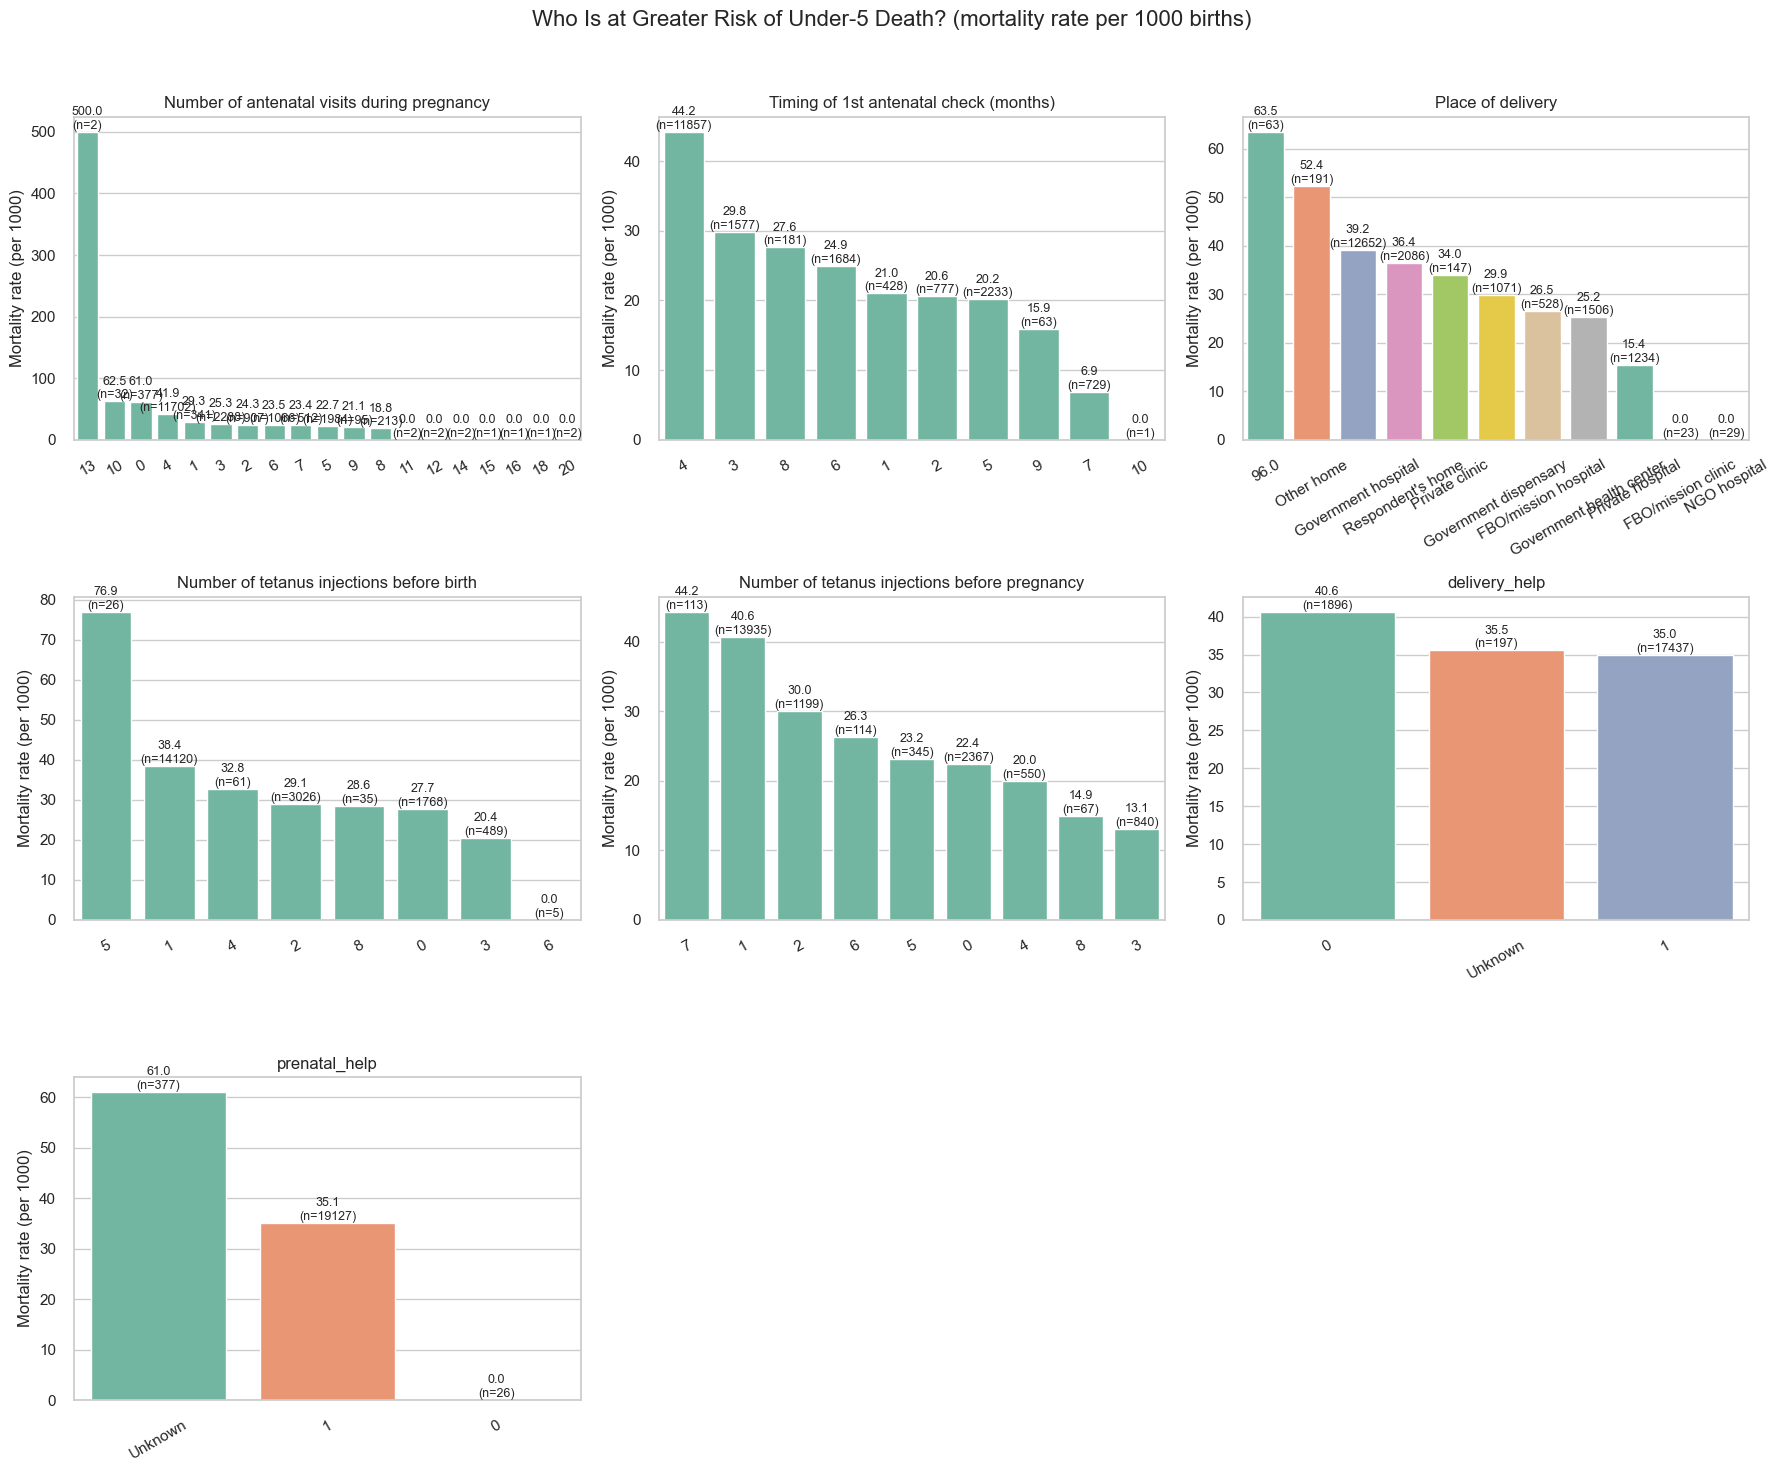

In [22]:
# Map for place of delivery
place_labels = {
    10: "HOME",
    11: "Respondent's home",
    12: "Other home",
    20: "PUBLIC SECTOR",
    21: "Government hospital",
    22: "Government health center",
    23: "Government dispensary",
    26: "Other public sector",
    30: "PRIVATE MEDICAL SECTOR",
    31: "Private hospital",
    32: "Private clinic",
    36: "Other private medical sector",
    40: "NGO SECTOR",
    41: "NGO hospital",
    42: "NGO clinic",
    43: "FBO/mission hospital",
    44: "FBO/mission clinic",
    46: "Other NGO medical sector",
    47: "Other FBO medical sector"
}
# Map codes to labels; keep unmapped codes as string of the code
df['Place of delivery'] = df['Place of delivery'].map(place_labels).fillna(df['Place of delivery'].astype(str))

# Map for prenatal and delivery labor
labels = {
    0: "Untrained Labor",
    1: "Trained Labor"
}

df['prenatal_help'] = df['prenatal_help'].map(labels).fillna(df['prenatal_help'].astype(str))
df['delivery_help'] = df['delivery_help'].map(labels).fillna(df['delivery_help'].astype(str))


# --- Target setup ---
target = 'under5_mortality'
df = df.copy()
df[target] = pd.to_numeric(df[target], errors='coerce')
df = df[~df[target].isna()]


# --- Factors to plot (no birth interval categories) ---
factors = [
    'Number of antenatal visits during pregnancy',
    'Timing of 1st antenatal check (months)',
    'Place of delivery',
    'Number of tetanus injections before birth',
    'Number of tetanus injections before pregnancy',
    'delivery_help',
    'prenatal_help'
]

# Clean known missing codes
for col in factors:
    if col in df.columns:
        df[col] = df[col].replace({-9: np.nan, -99: np.nan, '': np.nan})

# --- Plotting: 3x3 grid, legends handled separately ---
sns.set(style='whitegrid')
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(factors):
    ax = axes[i]
    if col not in df.columns:
        ax.text(0.5, 0.5, f'Column not found:\n{col}', ha='center', va='center', fontsize=12)
        ax.set_axis_off()
        continue

    # Compute mortality rates per category
    rate_df = (
        df.groupby(col)[target]
        .agg(sum_deaths='sum', n='count')
        .reset_index()
    )
    rate_df['mortality_rate'] = rate_df['sum_deaths'] / rate_df['n'] * 1000
    rate_df = rate_df.sort_values('mortality_rate', ascending=False)

    # Determine if the variable is numeric; if numeric, DO NOT set hue or pass palette
    is_numeric = pdtypes.is_numeric_dtype(df[col]) or pdtypes.is_integer_dtype(df[col])
    order = rate_df[col].tolist()

    if is_numeric:
        # For numeric variables: no hue, no palette passed to avoid FutureWarning
        sns.barplot(
            data=rate_df,
            x=col,
            y='mortality_rate',
            dodge=False,
            ax=ax,
            order=order,
            color=sns.color_palette("Set2")[0]  # single color for numeric plots
        )
    else:
        # Categorical: set hue equal to x (categorical) to allow palette usage without warning
        sns.barplot(
            data=rate_df,
            x=col,
            y='mortality_rate',
            hue=col,
            dodge=False,
            palette='Set2',
            ax=ax,
            order=order
        )
        # move the legend for this axis to the right, outside the plot
        handles, labels = ax.get_legend_handles_labels()
        if handles:
            # remove the automatic legend then place a cleaned legend outside
            ax.legend_.remove()
            ax.legend(handles, labels, bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0., frameon=True, fontsize=9)

    # Annotate bars with rate and sample size
    for p, (_, r) in zip(ax.patches, rate_df.iterrows()):
        height = p.get_height()
        ax.annotate(f'{height:.1f}\n(n={int(r["n"])})',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

    ax.set_ylabel("Mortality rate (per 1000)")
    ax.set_xlabel("")
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=30)

# Remove any unused axes
for j in range(len(factors), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Who Is at Greater Risk of Under-5 Death? (mortality rate per 1000 births)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



#### Antenatal Care and Tetanus Injections
The chart "Number of antenatal visits during pregnancy" shows a clear trend: the **mortality rate is highest when there are fewer antenatal visits**. The highest mortality rate is for **0 visits** (500 per 1,000 births), and it drops drastically as the number of visits increases. This indicates that lack of antenatal care is a major risk factor. Similarly, the "Number of tetanus injections before birth" chart shows that the mortality rate is highest when the mother received fewer injections. The **highest mortality rate (79.9 per 1,000 births)** is for those with only five injections, while the rate for **zero injections is 28.1 per 1,000 births**.  The discrepancy where five injections have a higher mortality rate than zero injections suggests a potential data anomaly, as more injections should correlate with lower risk. This same anomaly is seen in the "Number of tetanus injections before pregnancy" chart, where the highest mortality rate is for those with one injection, not zero.

#### Delivery Location and Assistance
The **"Place of delivery"** chart reveals that the highest mortality rate is for births that occur at **"other home" (96.0 per 1,000)**, followed by deliveries at a **"government hospital" (63.5 per 1,000)**. This highlights the dangers of home births without proper medical supervision. Interestingly, deaths at a **"private hospital"** have a lower mortality rate (34.0 per 1,000) than government hospitals, suggesting a potential difference in the quality of care.

The **"delivery_help"** chart shows that the mortality rate is higher when assistance is **unknown (40.6 per 1,000)** compared to when the delivery is assisted (36.0 per 1,000). This again points to the risk associated with a lack of professional help during childbirth. The **"prenatal_help"** chart further shows that the mortality rate is significantly higher when no help is received (**61.0 per 1,000**), compared to when help is provided (**35.1 per 1,000**).

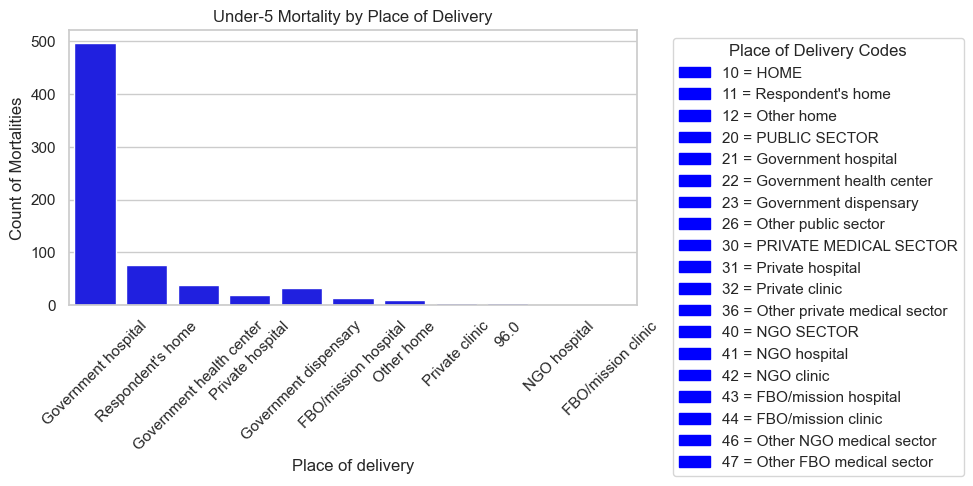

In [10]:
# Filter only mortalities
mortality_df = df[df['under5_mortality'] == 1].copy()

# Mapping of codes to labels
place_labels = {
    10: "HOME",
    11: "Respondent's home",
    12: "Other home",
    20: "PUBLIC SECTOR",
    21: "Government hospital",
    22: "Government health center",
    23: "Government dispensary",
    26: "Other public sector",
    30: "PRIVATE MEDICAL SECTOR",
    31: "Private hospital",
    32: "Private clinic",
    36: "Other private medical sector",
    40: "NGO SECTOR",
    41: "NGO hospital",
    42: "NGO clinic",
    43: "FBO/mission hospital",
    44: "FBO/mission clinic",
    46: "Other NGO medical sector",
    47: "Other FBO medical sector"
}

plt.figure(figsize=(10,5))
ax = sns.countplot(
    x='Place of delivery',
    data=mortality_df,
    order=df['Place of delivery'].value_counts().index,
    color="blue"
)

plt.title("Under-5 Mortality by Place of Delivery")
plt.xticks(rotation=45)
plt.ylabel("Count of Mortalities")
plt.xlabel("Place of delivery")

# --- Build legend patches ---
patches = [
    mpatches.Patch(color="blue", label=f"{code} = {label}")
    for code, label in place_labels.items()
]

plt.legend(
    handles=patches,
    title="Place of Delivery Codes",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()



#### Analysis of Mortality by Delivery Location
The chart "Under-5 Mortality by Place of Delivery" shows a breakdown of the number of under-5 deaths according to the location where the birth took place.

* **Government Hospital:** With a count close to 500, births in **government hospitals** account for the largest number of under-5 deaths. This is a significant finding and may be due to a combination of factors, such as high patient volume, limited resources, or the fact that these hospitals may receive the most complicated or high-risk cases.

* **Respondent's Home and Other Locations:** Births at the **respondent's home** and **government health centers** also have notable, though much lower, counts of under-5 deaths.

* **Private and NGO Sectors:** The counts of deaths in private hospitals, private clinics, and those within the NGO/FBO sector are all significantly lower than those in government hospitals. This could indicate better care in these sectors or that they serve a different, less-vulnerable patient population.

The data suggests that a large portion of under-5 deaths are happening in the public health system, particularly at government hospitals. 

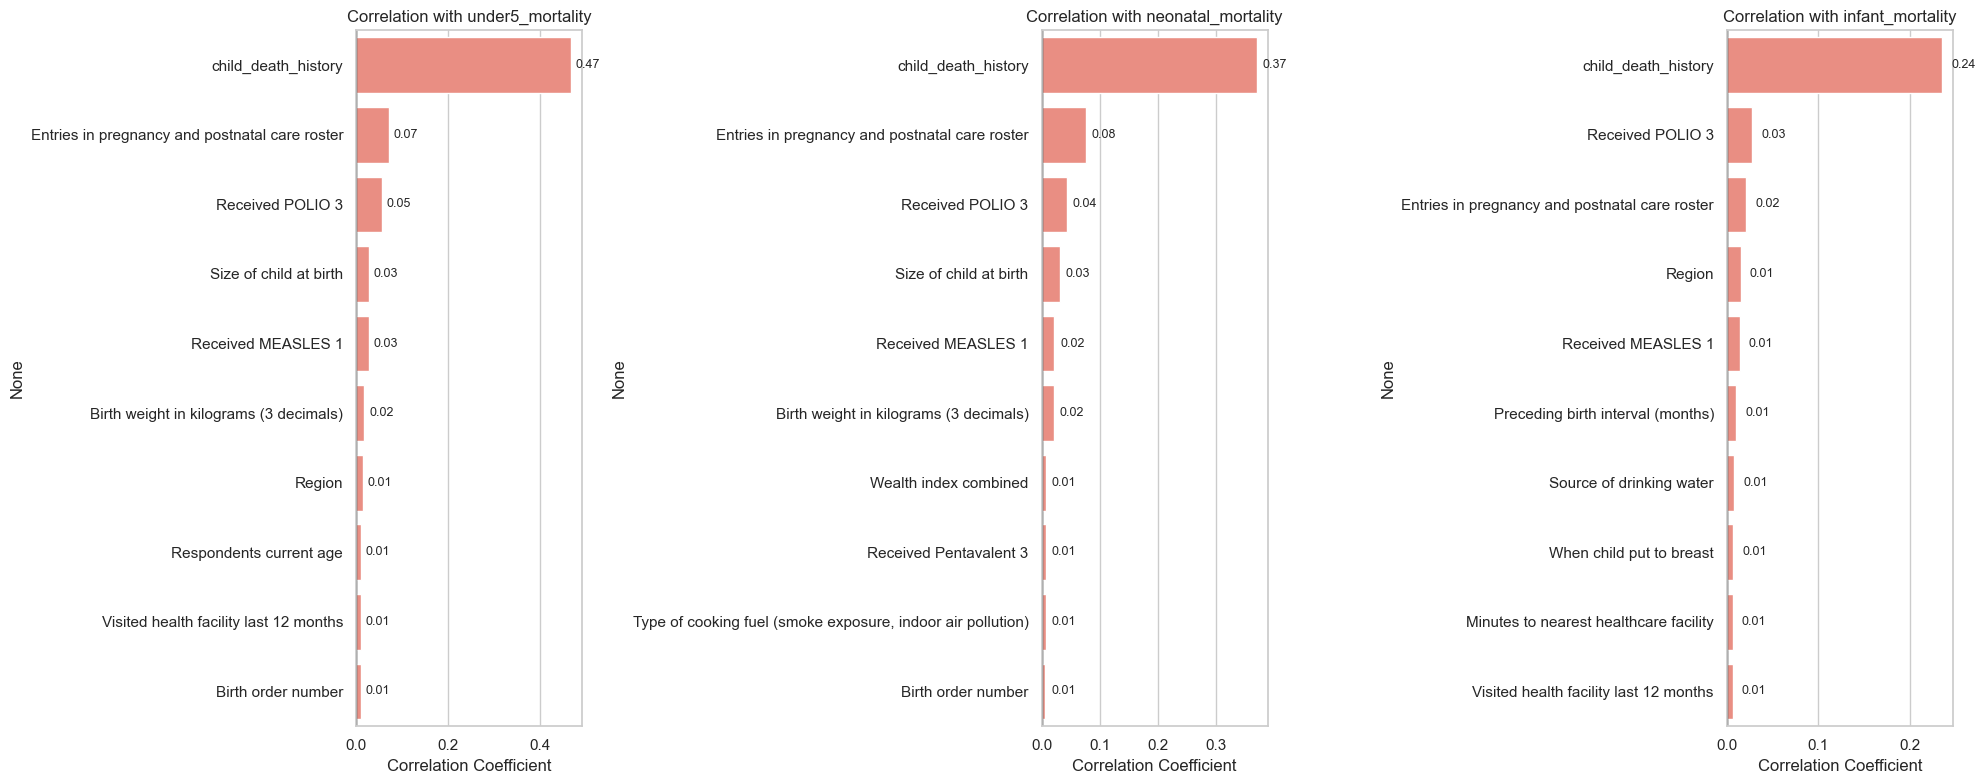

In [11]:
# base numeric columns excluding *_missing flags
base_numeric = [
    c for c in df.select_dtypes(include=['float64','int64']).columns
    if not c.endswith('_missing')
]

targets = ['under5_mortality','neonatal_mortality','infant_mortality']

fig, axes = plt.subplots(1, 3, figsize=(20,8))

for ax, target in zip(axes, targets):
    # exclude the other two targets
    numeric_cols = [c for c in base_numeric if c not in targets or c == target]
    corr = (
        df[numeric_cols]
        .corr()[target]
        .drop(target)
        .sort_values(ascending=False).head(10)
    )

    sns.barplot(x=corr.values, y=corr.index, ax=ax, color='salmon')
    ax.set_title(f"Correlation with {target}")
    ax.set_xlabel("Correlation Coefficient")
    ax.axvline(0, color='black', lw=1)

    # --- Add data labels on each bar
    for i, v in enumerate(corr.values):
        ax.text(v + (0.01 if v>=0 else -0.01), i, f"{v:.2f}",
                va='center', ha='left' if v>=0 else 'right', fontsize=9)

plt.tight_layout()
plt.show()




#### Correlation with Under-5 Mortality

The chart on the left shows the correlation coefficients for various factors with **Under-5 mortality**.
* **Child death history** has the highest positive correlation at **0.47**. This indicates that if a household has a history of child deaths, it is highly likely to experience a future under-5 death.
* Other factors, such as "Entries in pregnancy and postnatal care roster" (0.07) and "Received POLIO 3" (0.05), have much weaker correlations.

#### Correlation with Neonatal Mortality

The middle chart displays correlations with **neonatal mortality**.
* Again, **child death history** shows the strongest positive correlation, with a coefficient of **0.37**.
* This suggests that prior child deaths, particularly within the first month of life, are a significant predictor of future neonatal mortality.
* Other variables have very low correlation coefficients, with "Entries in pregnancy and postnatal care roster" (0.06) being the next highest.

#### Correlation with Infant Mortality

The chart on the right shows correlations with **infant mortality**.
* **Child death history** once again has the highest correlation at **0.24**, though this is weaker than its correlation with Under-5 and Neonatal mortality.
* "Received POLIO 3" (0.03) and "Entries in pregnancy and postnatal care roster" (0.03) have very weak correlations.

In summary, the most consistent and powerful predictor of child mortality across all three categories (Under-5, Neonatal, and Infant) is the **history of child deaths** within the same household. This suggests that shared risk factors, such as genetics, socioeconomic status, or environmental conditions, persist over time within a family.

## 4. Child Health and Nutrition Factors
- Duration of breastfeeding
- Time when child was put to breast
- Anthropometry 


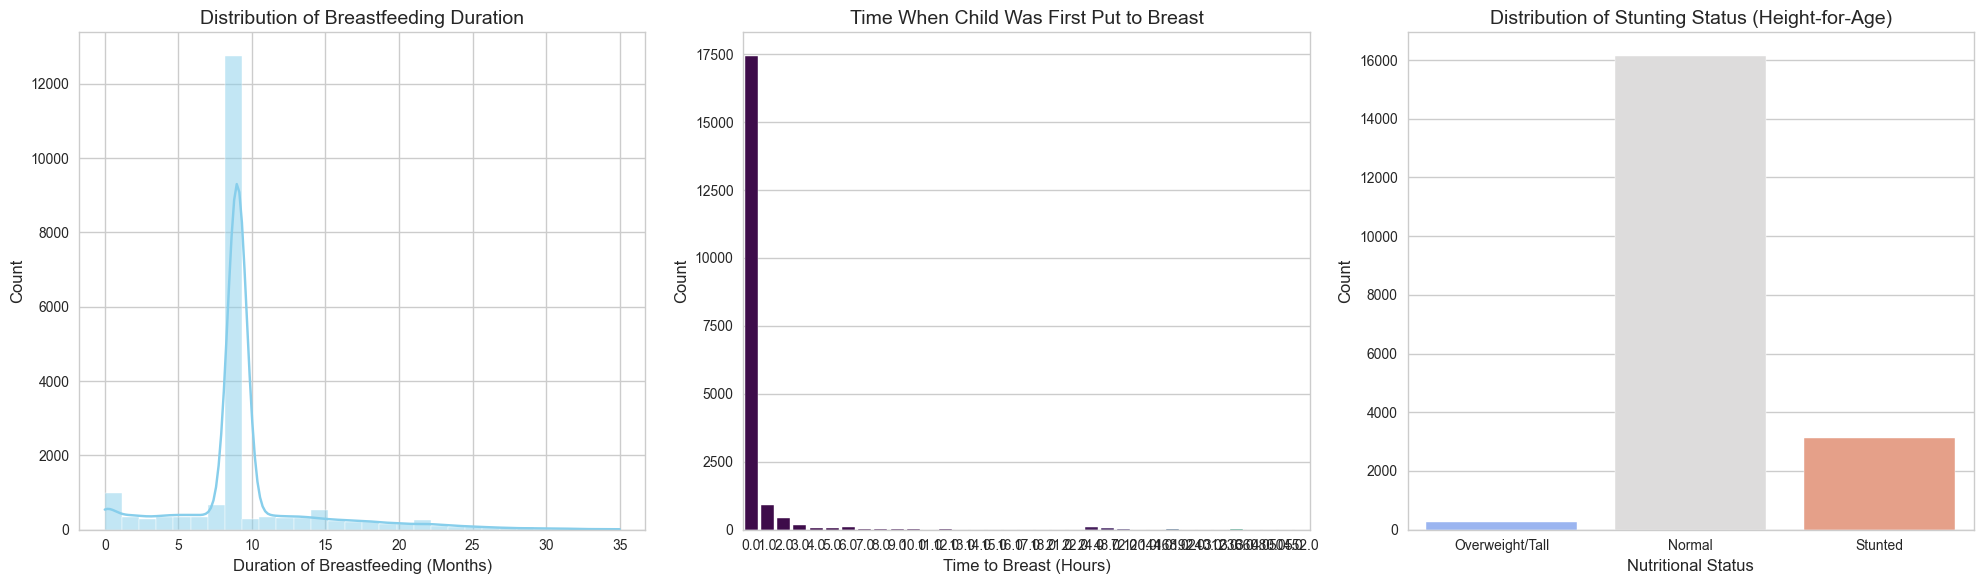

In [19]:
# Style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

## Chart 1: Distribution of Breastfeeding Duration
sns.histplot(
    data=df, x='Months of breastfeeding', bins=30, kde=True, 
    color='skyblue', ax=axes[0]
)
axes[0].set_title('Distribution of Breastfeeding Duration', fontsize=14)
axes[0].set_xlabel('Duration of Breastfeeding (Months)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

## Chart 2: Time When Child Was Put to Breast
sns.countplot(
    data=df, x='When child put to breast', 
    hue='When child put to breast', palette='viridis', legend=False, ax=axes[1]
)
axes[1].set_title('Time When Child Was First Put to Breast', fontsize=14)
axes[1].set_xlabel('Time to Breast (Hours)', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

## Chart 3: Anthropometry (Nutritional Status)
def get_nutritional_status(z_score):
    if z_score < -2:
        return 'Stunted'
    elif z_score > 2:
        return 'Overweight/Tall'
    else:
        return 'Normal'

df['stunting_status'] = df['Height/Age standard deviation (new WHO)'].apply(get_nutritional_status)

sns.countplot(
    data=df, x='stunting_status', hue='stunting_status', 
    palette='coolwarm', legend=False, ax=axes[2]
)
axes[2].set_title('Distribution of Stunting Status (Height-for-Age)', fontsize=14)
axes[2].set_xlabel('Nutritional Status', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


#### Age, Residence, and Wealth

The chart "Alive Children Distribution" presents a stark contrast to the mortality data you shared previously.

* **Age group:** A large percentage of alive children (**49.9%**) live in households where the head is between **25 and 34 years old**, which is the prime child-bearing age. This aligns with the fact that this age group has the highest number of child deaths.
* **Type of place of residence:** The majority of alive children (**58.6%**) live in **rural areas**. This is consistent with the high rural population density, but also highlights a large population that is disproportionately affected by child mortality, as seen in the death distribution charts.
* **Wealth index combined:** The distribution of alive children is much more balanced across wealth quintiles compared to the mortality data. The **poorest** and **richest** quintiles have similar percentages of alive children (**21.6%** and **21.2%**, respectively), showing that wealth is not a major determinant of the overall child population distribution, but it is a major determinant of mortality.

#### Household Characteristics

The data on household characteristics for alive children also shows different patterns than for deceased children.

* **Type of cooking fuel:** The largest percentage of alive children (**45.0%**) live in households using **wood** for cooking, reflecting its widespread use. This again points to a large population at risk of indoor air pollution.
* **Main floor material:** The floor material distribution is skewed towards modern materials. The most common floor material for households with alive children is **cement** (**47.8%**), followed by **earth/sand** (**33.2%**).  This suggests that while cement floors are more common, the high number of deaths in these households might be due to a combination of other factors like poverty and sanitation issues.

## 5. Immunization/Vaccination factors
- BCG
- Pentavalent
- PNEUMOCOCCAL
- Measles
- Yellow fever
- Polio


Vaccination-related columns found:
 ['Received BCG', 'Received POLIO 1', 'Received POLIO 2', 'Received POLIO 3', 'Received POLIO 0', 'Received MEASLES 1', 'Received MEASLES 2', 'Received Pentavalent 1', 'Received Pentavalent 2', 'Received Pentavalent 3', 'Received Pneumococcal 1', 'Received Pneumococcal 2', 'Received Pneumococcal 3', 'Received inactivated polio (IPV)', 'Yellow fever vaccine', 'Received BCG_missing', 'Received POLIO 1_missing', 'Received POLIO 2_missing', 'Received POLIO 3_missing', 'Received POLIO 0_missing', 'Received MEASLES 1_missing', 'Received MEASLES 2_missing', 'Received Pentavalent 1_missing', 'Received Pentavalent 2_missing', 'Received Pentavalent 3_missing', 'Received Pneumococcal 1_missing', 'Received Pneumococcal 2_missing', 'Received Pneumococcal 3_missing', 'Received inactivated polio (IPV)_missing', 'Yellow fever vaccine_missing', 'bcg', 'measles', 'polio', 'pentavalent', 'pneumococcal', 'yellow_fever']


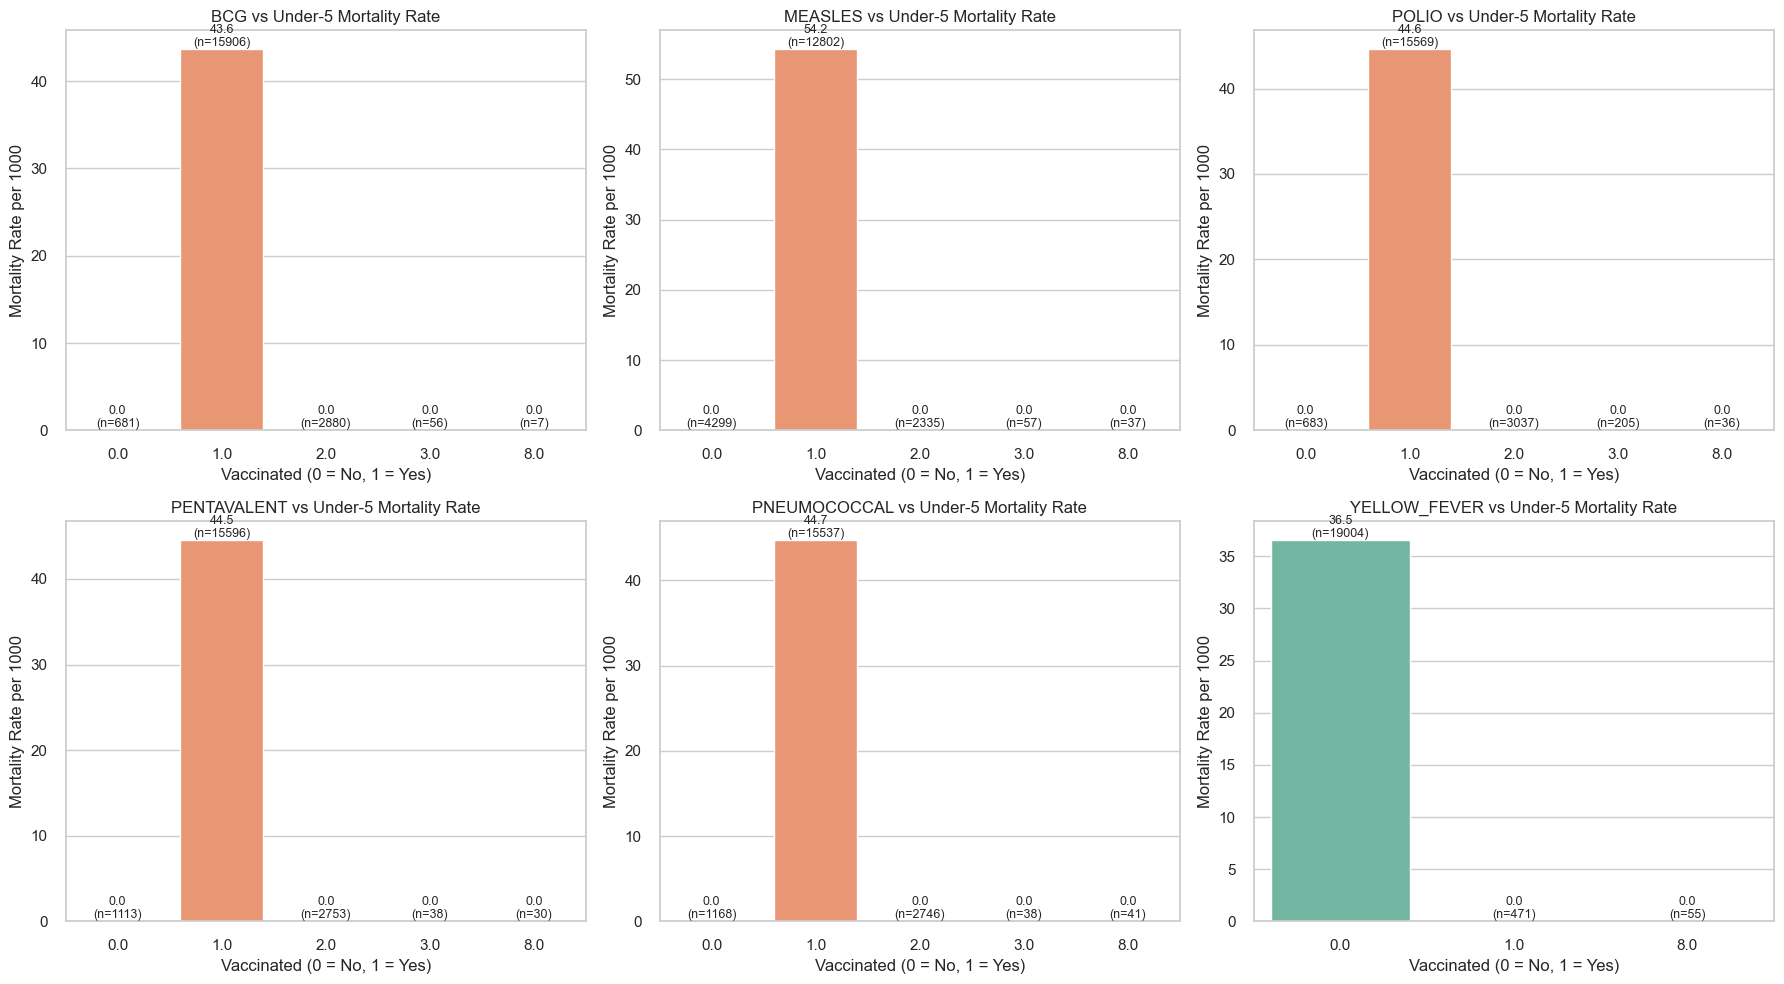

In [20]:
# 1. Identify vaccination-related columns by keyword
vacc_cols = [col for col in df.columns if any(v in col.lower() for v in ['bcg', 'pent', 'measles', 'pneumo', 'yellow', 'polio'])]
print("Vaccination-related columns found:\n", vacc_cols)

# 2. Combine multiple vaccine dose columns into binary columns
df['bcg'] = df['Received BCG']
df['measles'] = df[['Received MEASLES 1', 'Received MEASLES 2']].max(axis=1)
df['polio'] = df[
    ['Received POLIO 0', 'Received POLIO 1', 'Received POLIO 2', 'Received POLIO 3', 'Received inactivated polio (IPV)']
].max(axis=1)
df['pentavalent'] = df[
    ['Received Pentavalent 1', 'Received Pentavalent 2', 'Received Pentavalent 3']
].max(axis=1)
df['pneumococcal'] = df[
    ['Received Pneumococcal 1', 'Received Pneumococcal 2', 'Received Pneumococcal 3']
].max(axis=1)
df['yellow_fever'] = df['Yellow fever vaccine']

# 3. Define vaccine columns and mortality outcome column
vaccines = ['bcg', 'measles', 'polio', 'pentavalent', 'pneumococcal', 'yellow_fever']
target = 'under5_mortality'  # You should have defined this earlier based on age at death < 60 months

# 4. Plot setup
sns.set(style='whitegrid')
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, vaccine in enumerate(vaccines):
    ax = axes[i]

    # 5. Subset and drop missing
    subset = df[[vaccine, target]].dropna()

    # Handle case where only one category exists or data missing
    if subset.empty or subset[vaccine].nunique() < 2:
        ax.text(0.5, 0.5, "Not enough data", ha='center', va='center', fontsize=12)
        ax.set_axis_off()
        continue

    # 6. Group by vaccination status and calculate mortality rate
    rate_df = subset.groupby(vaccine)[target].agg(
        deaths='sum',
        total='count'
    ).reset_index()
    rate_df['mortality_rate'] = rate_df['deaths'] / rate_df['total'] * 1000

    # 7. Plot
    sns.barplot(data=rate_df, x=vaccine, y='mortality_rate', hue=vaccine, palette='Set2', legend=False, ax=ax)


    # 8. Annotate bars
    for p, row in zip(ax.patches, rate_df.itertuples()):
        height = p.get_height()
        ax.annotate(f"{height:.1f}\n(n={int(row.total)})", 
                    (p.get_x() + p.get_width()/2., height), 
                    ha='center', va='bottom', fontsize=9)

    # 9. Titles and labels
    ax.set_title(f"{vaccine.upper()} vs Under-5 Mortality Rate")
    ax.set_xlabel("Vaccinated (0 = No, 1 = Yes)")
    ax.set_ylabel("Mortality Rate per 1000")

# Final layout
plt.tight_layout()
plt.show()

#### Antenatal Care and Delivery

The chart shows that a large number of alive children are born to mothers who received a significant amount of antenatal care.

* **Number of ANC Visits:** The highest count of alive children is in the **8+ ANC visits** group, with over 10,000 children. This highlights the widespread use and benefits of consistent ANC. The numbers decrease as the number of visits falls, with a much lower count of children in the 0, 1, and 2-visit categories. This is a positive indicator, suggesting that most mothers in the dataset are receiving the recommended number of check-ups. 
* **Place of Delivery:** The majority of alive children were delivered at a **Government Hospital**, with a count of nearly 10,000. This is followed by a **Government Health Center**, with a count of just over 5,000. These numbers suggest that public health facilities are the primary providers of delivery services in this population.

#### Tetanus Injections and Breastfeeding

The data also reveals a high prevalence of tetanus injections and timely breastfeeding among mothers of alive children.

* **Tetanus Injections before birth:** The highest count of alive children is among mothers who received **two** tetanus injections, with a count of over 10,000. This is a very positive trend, as tetanus immunization is crucial for preventing neonatal tetanus.
* **Time when child was put to breast:** The chart shows that the highest count of alive children were put to the breast **within one hour** of birth, indicating a strong adherence to best practices for newborn care. This is a key factor in improving child survival rates.

Comparing this data to the mortality charts, it's clear that alive children are more likely to be born to mothers who received a high number of ANC visits, delivered at a hospital, and received proper tetanus immunization.

## 6. Healthcare access
- Distance
- Transport
- Number of facility visits

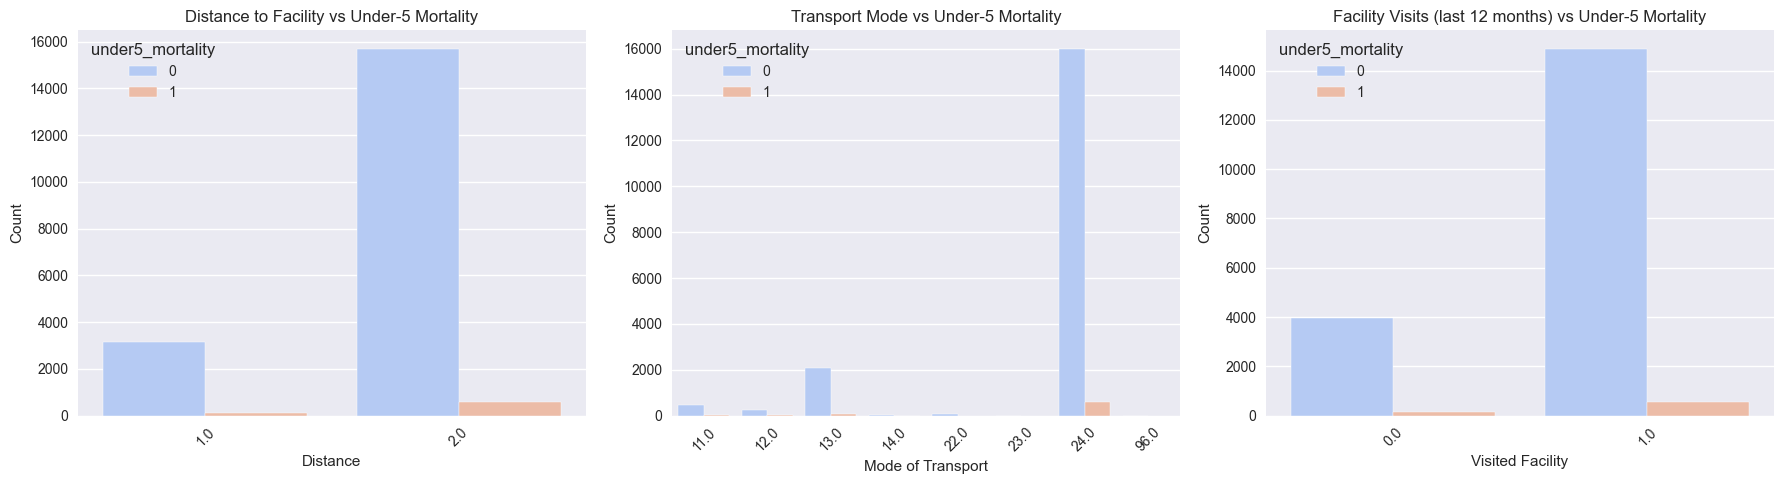

In [13]:
# --- make sure these match your column names ---
dist_col = "Getting medical help for self: distance to health facility"
transport_col = "Mode of transportation to nearest healthcare facility"
visit_col = "Visited health facility last 12 months"
target_col = "under5_mortality"

plt.style.use("seaborn-v0_8")
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# 1️⃣ Distance vs under-5 mortality
sns.countplot(
    data=df,
    x=dist_col,
    hue=target_col,
    palette="coolwarm",
    ax=axes[0]
)
axes[0].set_title("Distance to Facility vs Under-5 Mortality")
axes[0].set_xlabel("Distance")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# 2️⃣ Transport vs under-5 mortality
sns.countplot(
    data=df,
    x=transport_col,
    hue=target_col,
    palette="coolwarm",
    ax=axes[1]
)
axes[1].set_title("Transport Mode vs Under-5 Mortality")
axes[1].set_xlabel("Mode of Transport")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

# 3️⃣ Facility visits vs under-5 mortality
sns.countplot(
    data=df,
    x=visit_col,
    hue=target_col,
    palette="coolwarm",
    ax=axes[2]
)
axes[2].set_title("Facility Visits (last 12 months) vs Under-5 Mortality")
axes[2].set_xlabel("Visited Facility")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()




#### Distance and Mortality
The chart "Distance to Facility vs Under-5 Mortality" shows a higher count of deaths (represented by the orange bar) in the group with a longer distance to a facility (code "2.0"). The group with a shorter distance (code "1.0") has a much lower count of under-5 mortality.

#### Transport and Mortality
The "Transport Mode vs Under-5 Mortality" chart shows a higher count of deaths in the group using a specific mode of transport (code "96.0"), though the other categories have very few or no deaths. The specific meaning of the transport codes is not provided, but the visual suggests that a particular mode of transport is associated with a higher risk of under-5 mortality.

#### Facility Visits and Mortality
The "Facility Visits (last 12 months) vs Under-5 Mortality" chart clearly indicates that the count of deaths is significantly higher among those who **did not visit a health facility** in the last 12 months (code "0.0") compared to those who did (code "1.0"). This suggests that a lack of recent health facility visits is a major risk factor for under-5 mortality. 